In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
all_data = pd.read_csv('all_data.csv')

In [3]:
all_data = all_data.dropna()
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"


In [4]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [5]:
d = pd.DatetimeIndex(all_data['Order Date'])

In [6]:
all_data['Year'] = d.year
all_data['Month'] = d.month_name()
all_data['Day'] = d.day_name()
all_data['Hour'] = d.hour
all_data['Minute'] = d.minute

In [7]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",2019,April,Friday,8,46
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",2019,April,Sunday,22,30
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,April,Friday,14,38


In [8]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

In [9]:
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Hour,Minute,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",2019,April,Friday,8,46,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",2019,April,Sunday,22,30,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,April,Friday,14,38,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,April,Friday,14,38,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",2019,April,Tuesday,9,27,11.99


In [12]:
all_data = all_data[all_data['Year'] != 2020] #year 2019 only

###          SALES PER MONTH

In [13]:
months = ['January', 'February', 'March', 'April', 'May','June', 'July','August',
         'October', 'November', 'December']

Text(0, 0.5, '$ Sales in USD')

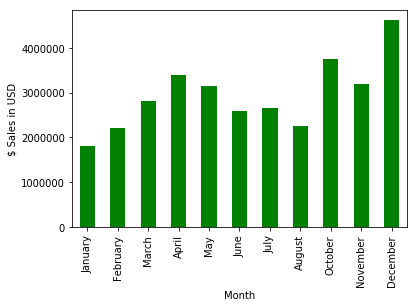

In [14]:
all_data.groupby('Month')['Sales'].sum().reindex(months).plot(kind = 'bar',color = 'green')
plt.ylabel('$ Sales in USD')

### CITY WITH HIGHEST NUMBER OF SALES

In [15]:
all_data['Purchase Address'][10930].split(',')[1:3][1].split()[0]

'CA'

In [16]:
def get_city(add):
    return add.split(',')[1].lstrip()

In [17]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))

In [18]:
def get_state(add):
    return add.split(',')[1:3][1].split()[0]

all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))

In [19]:
all_data['City_state'] = all_data['City'] + ' '+  all_data['State']

In [20]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Hour,Minute,Sales,City,State,City_state
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",2019,April,Friday,8,46,23.90,Dallas,TX,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",2019,April,Sunday,22,30,99.99,Boston,MA,Boston MA
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,April,Friday,14,38,600.00,Los Angeles,CA,Los Angeles CA


In [21]:
all_data['State'].unique()

array(['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME'], dtype=object)

Text(0, 0.5, '$ Sales in USD')

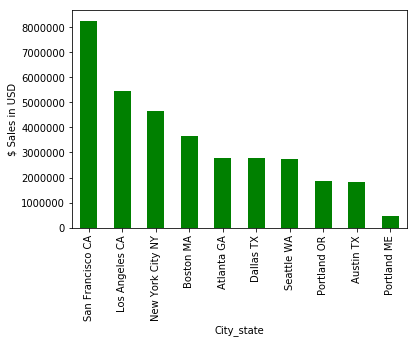

In [22]:
all_data.groupby('City_state').sum()['Sales'].sort_values(ascending = False).plot(kind = 'bar', color = 'green')
plt.ylabel('$ Sales in USD')

### TIME TO DISPLAY ADVERTISEMENT TO INCREASE CHANCES OF CUSTOMERS BUYING PRODUCTS

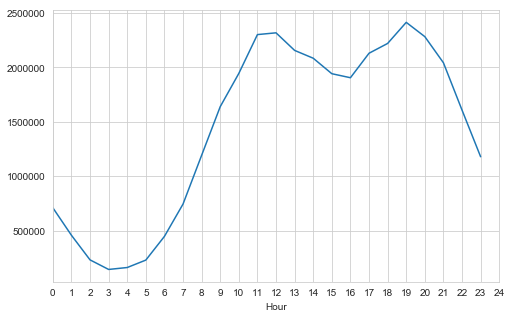

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize= (8,5))
all_data.groupby('Hour').sum()['Sales'].plot(kind = 'line')
plt.xticks(np.arange(0, 25, step=1))
plt.show()

### DAY WITH MOST SALES

In [24]:
all_data.groupby('Day').sum()['Sales'].sort_values(ascending =False)

Day
Tuesday      5.087957e+06
Wednesday    4.980152e+06
Sunday       4.932170e+06
Saturday     4.904357e+06
Monday       4.883327e+06
Friday       4.855938e+06
Thursday     4.839465e+06
Name: Sales, dtype: float64

### MOST SOLD PRODUCTS and AVERAGE PRICE OF PRODUCT

In [25]:
products = [i for i, j in all_data.groupby('Product')]

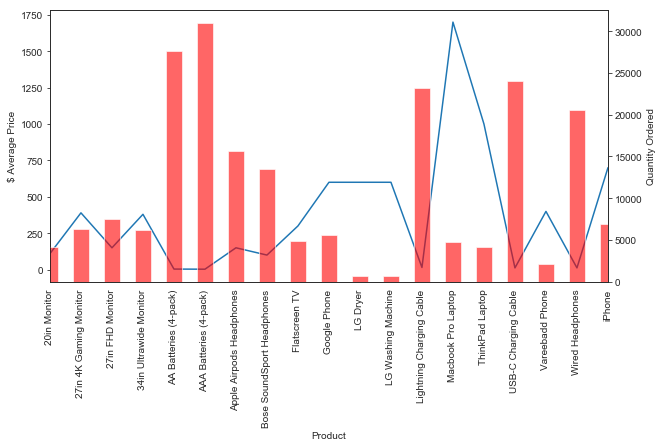

In [26]:
sns.set_style('white')
fig, ax1 = plt.subplots(figsize = (10,5))
ax2 =ax1.twinx()

all_data.groupby(['Product']).sum()['Quantity Ordered'].plot('bar',ax2, color = 'red', alpha = 0.6)
ax2.set_ylabel('Quantity Ordered', )
all_data.groupby('Product')['Price Each'].mean().plot('line', ax1)
ax1.set_ylabel('$ Average Price')
ax1.set_xticklabels(products, rotation = 'vertical')
plt.show()

### PRODUCTS OFTEN SOLD TOGETHER

In [27]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Hour,Minute,Sales,City,State,City_state
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,April,Friday,14,38,600.00,Los Angeles,CA,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,April,Friday,14,38,11.99,Los Angeles,CA,Los Angeles CA
17,176574,Google Phone,1,600.00,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",2019,April,Wednesday,19,42,600.00,Los Angeles,CA,Los Angeles CA
18,176574,USB-C Charging Cable,1,11.95,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",2019,April,Wednesday,19,42,11.95,Los Angeles,CA,Los Angeles CA
29,176585,Bose SoundSport Headphones,1,99.99,4/7/2019 11:31,"823 Highland St, Boston, MA 02215",2019,April,Sunday,11,31,99.99,Boston,MA,Boston MA


In [28]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(5)

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [30]:
from itertools import combinations
from collections import Counter

In [31]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [32]:
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1004),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

### PRICE OF EACH PRODUCT VS QUANTITY ORDERED

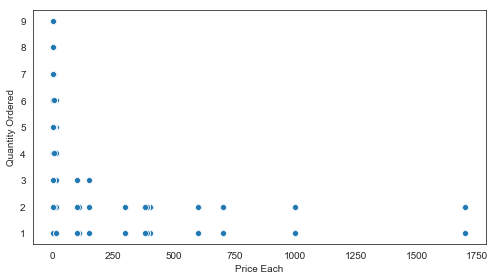

In [33]:
fig, ax1 = plt.subplots(figsize = (7,4))
sns.scatterplot(x= all_data['Price Each'], y = all_data['Quantity Ordered'], ax = ax1)
plt.tight_layout()
plt.show()

### QUANTITY OF EACH PRODUCT ORDERED MONTHLY

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Hour,Minute,Sales,City,State,City_state
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",2019,April,Friday,8,46,23.90,Dallas,TX,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",2019,April,Sunday,22,30,99.99,Boston,MA,Boston MA
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,April,Friday,14,38,600.00,Los Angeles,CA,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",2019,April,Friday,14,38,11.99,Los Angeles,CA,Los Angeles CA
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",2019,April,Tuesday,9,27,11.99,Los Angeles,CA,Los Angeles CA


In [35]:
data = all_data[['Product', 'Order Date', 'Quantity Ordered']]

In [36]:
data['date_conv'] = pd.to_datetime(data['Order Date'])

C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
data.set_index('date_conv', inplace= True)

In [38]:
data.head()

,Product,Order Date,Quantity Ordered
date_conv,,,
2019-04-19 08:46:00,USB-C Charging Cable,4/19/2019 8:46,2
2019-04-07 22:30:00,Bose SoundSport Headphones,4/7/2019 22:30,1
2019-04-12 14:38:00,Google Phone,4/12/2019 14:38,1
2019-04-12 14:38:00,Wired Headphones,4/12/2019 14:38,1
2019-04-30 09:27:00,Wired Headphones,4/30/2019 9:27,1


In [39]:
product_dfs = []
for each in data['Product'].unique():
    product_dfs.append(data[data['Product'] == each])

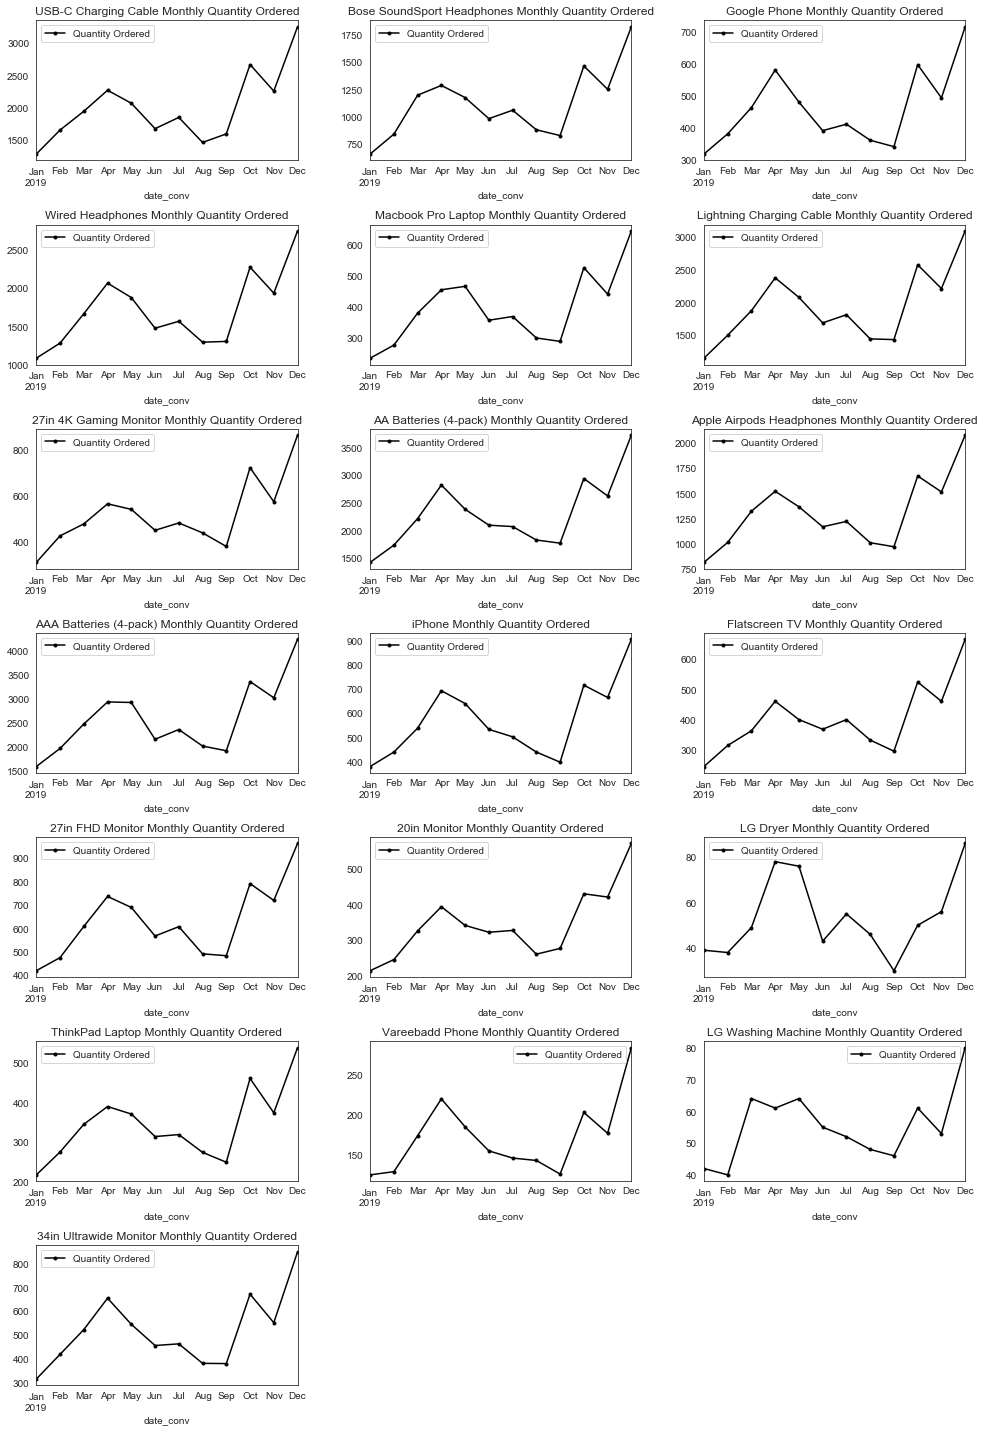

In [40]:
fig = plt.figure(figsize=(14,20))
prod = data['Product'].unique()
for i, pro in zip(range(len(product_dfs)), prod):
    ax=plt.subplot(7,3,i+1) 
    product_dfs[i].resample('M').sum().plot(kind = 'line', ax = ax, c = 'black', marker= '.')
    plt.title(f'{pro} Monthly Quantity Ordered')
plt.tight_layout()    
plt.show()